# Computer Vision and Convolutional Neural Network

## What we're going to cover



We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

**0. Computer vision libraries in PyTorch**

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


## Imports

In [77]:
# Import pytorch
import torch
from torch import nn

# Import TorchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import numpy as np 
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
print(f"PyTorch Version: {torch.__version__} & TorchVision Version: {torchvision.__version__}")


PyTorch Version: 2.7.0+cu126 & TorchVision Version: 0.22.0+cu126


In [79]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE


device(type='cuda')

## Getting Dataset

We will be using ([FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)) 

In [80]:
train_data = datasets.FashionMNIST(root=f"/home/shushanksingh/work/pytroch-deep-learning/Data", 
                                train=True, 
                                download=True, 
                                transform=ToTensor(),
                                target_transform=None
                                )

test_data = datasets.FashionMNIST(root=f"/home/shushanksingh/work/pytroch-deep-learning/Data",
                                  train= False, 
                                  transform=ToTensor(),
                                  target_transform=None,
                                  download=True
                                  )


In [81]:
len(train_data), len(test_data), type(train_data)


(60000, 10000, torchvision.datasets.mnist.FashionMNIST)

In [82]:
image, label = train_data[0]
print(f"Shape of Image is: {image.shape} -> [color_channel, height, width] and the label for this image is: {label}")
# 1 as color channel means its a black and white image


Shape of Image is: torch.Size([1, 28, 28]) -> [color_channel, height, width] and the label for this image is: 9


In [83]:
classes = train_data.classes
print(classes)
print(train_data.class_to_idx)
print(f"Image at index 0 is of classes : {train_data.classes[label]}")


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
Image at index 0 is of classes : Ankle boot


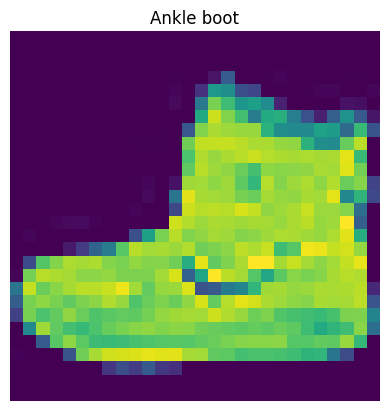

In [84]:
plt.imshow(image.squeeze());
plt.title(classes[label]);
plt.axis(False);


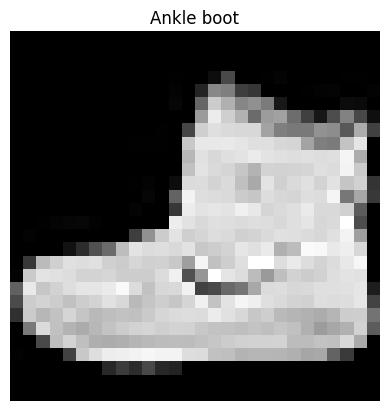

In [85]:
plt.imshow(image.squeeze(), cmap='grey');
plt.title(classes[label]);
plt.axis(False);


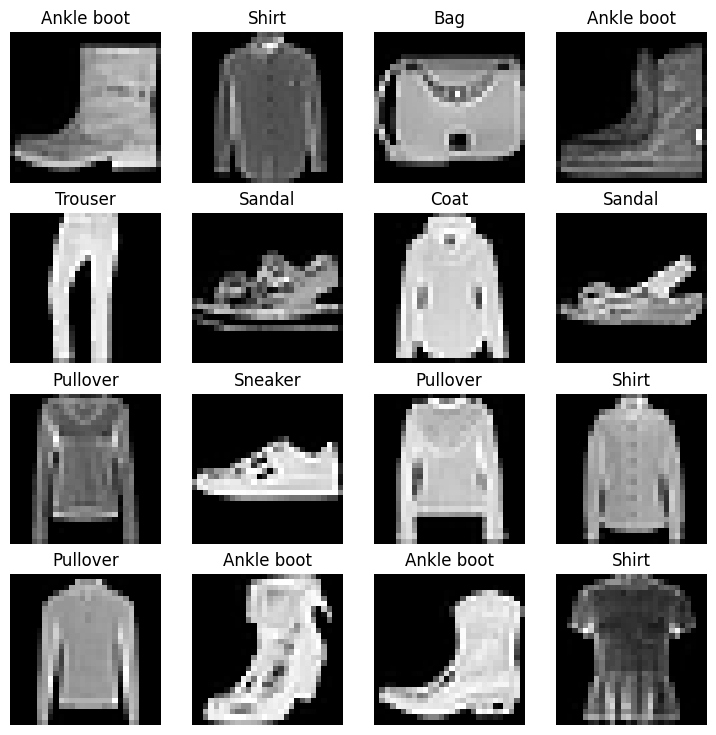

In [86]:
# plotting a subset of images from the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
row , col = 4, 4
for i in range(1, row*col + 1):
    randindx = torch.randint(low = 0, high= len(train_data),  size=[1]).item()
    img , label = train_data[randindx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(classes[label])
    plt.axis(False);


## Dataloader


In [87]:
train_data, test_data


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: /home/shushanksingh/work/pytroch-deep-learning/Data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: /home/shushanksingh/work/pytroch-deep-learning/Data
     Split: Test
     StandardTransform
 Transform: ToTensor())

So write now our data is in pytroch datasets but we need it to convert it into dataloader       
A Dataloader load the data into the model in batches (min-batches)  
Batches : it more computationally efficient and it gives our neural network chances to update its gradients per epoch

In [114]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32 

train_dataloader = DataLoader(
    dataset= train_data, 
    shuffle=True, 
    batch_size= BATCH_SIZE,
    drop_last= True
)


test_dataloader = DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE, 
    shuffle = False
)


In [89]:
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f"Length of training dataloader: {len(train_dataloader)} of batch size {BATCH_SIZE}")
print(f"Length of training dataloader: {len(test_dataloader)} of batch size {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f6ca8542980>, <torch.utils.data.dataloader.DataLoader object at 0x7f6d009a1ea0>)
Length of training dataloader: 1875 of batch size 32
Length of training dataloader: 313 of batch size 32


In [90]:
# what inside our data loader 
train_features_batch, train_label_batch = next(iter(train_dataloader))  # converted the loader into iterable and getting the next 
# as our dataloader contains 1872 iterables 

print(train_features_batch.shape, train_label_batch.shape)

# [32, 1, 28, 28] - batch_size, color channel, height, width


torch.Size([32, 1, 28, 28]) torch.Size([32])


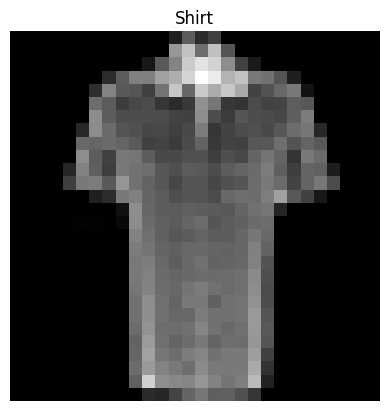

In [91]:
torch.manual_seed(42)
randomIdx = torch.randint(0, len(train_features_batch), [1]).item()
img, label = train_features_batch[randomIdx], train_label_batch[randomIdx]
plt.imshow(img.squeeze(), cmap='grey');
plt.title(classes[label]);
plt.axis(False);


## Building model_0: baseline with two linear layers

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

In [92]:
flatten = nn.Flatten()
x = train_features_batch[0]

output = flatten(x) # this internally does the forward pass 
print(f"Size of x: {x.shape}, and size of output: {output.shape}")
# x [1, 28, 28] and output = [1, 28*28] -> [1, 784]


Size of x: torch.Size([1, 28, 28]), and size of output: torch.Size([1, 784])


In [ ]:
# Model

class FashionMNISTModel0(nn.Module):
    """
    Baseline neural network model for FashionMNIST classification.

    This model consists of:
    - A flattening layer to convert 2D image input into a 1D vector.
    - One hidden linear layer.
    - An output linear layer for classification.

    Args:
        input_features (int): Number of input features (e.g., 28*28 for 28x28 images).
        output_features (int): Number of output classes (e.g., 10 for FashionMNIST).
        hidden_units (int): Number of units in the hidden layer.

    Example:
        model = FashionMNISTModel0(input_features=784, output_features=10, hidden_units=10)
        output = model(torch.randn(32, 1, 28, 28))  # Forward pass with batch of 32 images
    """
    def __init__(
            self, 
            input_features: int, 
            output_features: int, 
            hidden_units: int
    ):
        super().__init__()
        # Sequential stack of layers:
        # 1. Flatten input from [batch, 1, 28, 28] to [batch, 784]
        # 2. Linear layer mapping input to hidden units
        # 3. Linear layer mapping hidden units to output classes
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )   
    
    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, 1, 28, 28].

        Returns:
            torch.Tensor: Output logits of shape [batch_size, output_features].
        """
        return self.layer_stack(x)


In [145]:
model_0 = FashionMNISTModel0(input_features=28*28,  # Image height*width
                             output_features=10, # Number of class 
                             hidden_units=10
                             ).to(DEVICE)
model_0


FashionMNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [146]:
def get_model_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    return total_params

total_params = get_model_parameters(model_0)
print(f"Total number of parameters in the model: {total_params}")


Total number of parameters in the model: 7960


In [147]:
# dummy_img = torch.rand([1, 1, 28, 28]).to(DEVICE)
# print(model_0(dummy_img).shape)


In [148]:
model_0.state_dict()


OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0264,  0.0048,  0.0172,  ..., -0.0299,  0.0230, -0.0328],
                      [-0.0198, -0.0060, -0.0241,  ...,  0.0150,  0.0003, -0.0052],
                      [-0.0173, -0.0047, -0.0304,  ..., -0.0306,  0.0014, -0.0078],
                      ...,
                      [-0.0093,  0.0324,  0.0055,  ..., -0.0044,  0.0154,  0.0208],
                      [ 0.0085,  0.0163,  0.0224,  ..., -0.0051,  0.0102, -0.0182],
                      [ 0.0015, -0.0176, -0.0216,  ...,  0.0163,  0.0069, -0.0078]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0002,  0.0307,  0.0238,  0.0122, -0.0257, -0.0120,  0.0228,  0.0321,
                      -0.0169,  0.0152], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[-0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,  0.0932, -0.1864,
                        0.2488,  0.1500],
                      [ 0

## Loss function, optimizer, evaluations

In [149]:
import torchmetrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(DEVICE)


## Timing function

In [150]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = 'cpu'):
    time = end -start 
    print(f"Time Taken on device {device}: {time:.3f} seconds")


## Training and Testing


In [151]:
from tqdm.auto import tqdm

EPOCHS = 3

# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start timer to measure training time
train_time_start_on_gpu = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f'epoch: {epoch}\n---------')

    training_loss = 0  # Accumulate training loss for the epoch
    for batch, (X, y) in enumerate(train_dataloader):
        # Move data to the target device (CPU or GPU)
        X, y = X.to(DEVICE), y.to(DEVICE)
        # Set model to training mode
        model_0.train()
        
        # Forward pass: compute predictions
        y_preds = model_0(X)

        # Compute loss for the batch
        loss = loss_fn(y_preds, y)
        training_loss += loss  # Accumulate batch loss

        # Zero the gradients before backward pass
        optimizer.zero_grad()

        # Backward pass: compute gradients
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Print progress every 400 batches
        if batch % 400 == 0: 
            print(f'Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples')
    
    # Average training loss over all batches
    training_loss /= len(train_dataloader)

    # Evaluate on the test dataset
    test_loss, test_acc = 0, 0 
    model_0.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        for X, y in test_dataloader:
            # Move test data to the target device
            X, y = X.to(DEVICE), y.to(DEVICE)

            # Forward pass: compute predictions
            y_test_preds = model_0(X)

            # Accumulate test loss
            test_loss += loss_fn(y_test_preds, y)

            # Accumulate test accuracy
            test_acc += accuracy_fn(y_test_preds.argmax(dim=1), y)
        
        # Average test loss and accuracy over all batches
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {training_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# End timer after training
train_time_end_on_gpu = timer()

# Print total training time
print_train_time(start=train_time_start_on_gpu, 
                 end=train_time_end_on_gpu, 
                 device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---------
Looked at 0/ 60000 samples


Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 33%|███▎      | 1/3 [00:08<00:17,  8.55s/it]


Train loss: 0.59478 | Test loss: 0.50880, Test acc: 0.82%

epoch: 1
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 67%|██████▋   | 2/3 [00:17<00:08,  8.54s/it]


Train loss: 0.48073 | Test loss: 0.48769, Test acc: 0.83%

epoch: 2
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


100%|██████████| 3/3 [00:25<00:00,  8.53s/it]


Train loss: 0.45673 | Test loss: 0.47976, Test acc: 0.83%

Time Taken on device cuda:0: 25.600 seconds


## Make Predictions and Get results 

In [166]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               accuracy: torchmetrics.Accuracy, 
               loss_fn: torch.nn.Module,
               device: torch.device = 'cpu', 
               pretty_print: bool = True) -> dict:
    """
    Evaluates a PyTorch model on a given dataset and optionally prints the results in a pretty format.

    Args:
        model (torch.nn.Module): The model to evaluate.
        data_loader (torch.utils.data.DataLoader): DataLoader providing the evaluation dataset.
        accuracy (torchmetrics.Accuracy): TorchMetrics accuracy object to compute accuracy.
        loss_fn (torch.nn.Module): Loss function used to calculate model loss.
        device (torch.device, optional): Device to run evaluation on ('cpu' or 'cuda'). Default is 'cpu'.
        pretty_print (bool, optional): If True, prints the evaluation results in a formatted style. 
                                       If False, returns the results as a dictionary.

    Returns:
        dict: A dictionary containing model class name, average loss, accuracy, and device used,
              only if pretty_print is False. If pretty_print is True, results are printed and None is returned.
    """

    # Move model to the specified device and set it to evaluation mode
    model.to(device)
    model.eval()

    # Reset accuracy metric at the beginning of evaluation
    accuracy.reset()

    # Initialize total loss accumulator
    total_loss = 0.0

    # Disable gradient calculation for memory efficiency and speed during inference
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Move inputs and targets to the specified device
            X, y = X.to(device), y.to(device)

            # Forward pass: compute predictions
            preds = model(X)

            # Compute loss for the batch and accumulate it
            loss = loss_fn(preds, y)
            total_loss += loss.item()

            # Update the accuracy metric using predicted and actual labels
            accuracy.update(preds.argmax(dim=1), y)

    # Calculate average loss over all batches
    avg_loss = total_loss / len(data_loader)

    # Compute final accuracy
    final_acc = accuracy.compute()

    # Pack results into a dictionary
    result = {
        "model class Name": model.__class__.__name__,
        "loss": avg_loss,
        "acc": final_acc.item(),
        "device": str(device)
    }

    # Define a formatted string for pretty printing
    pretty = (
        "\n📊 Evaluation Results\n"
        "----------------------------\n"
        f"🧠 Model Class : {result['model class Name']}\n"
        f"💻 Device      : {result['device']}\n"
        f"🔢 Accuracy    : {result['acc'] * 100:.2f}%\n"
        f"📉 Loss        : {result['loss']:.4f}\n"
    )

    # Print the results prettily or return the raw result dictionary
    if pretty_print:
        print(pretty)
    else:
        return result


In [168]:
eval_model(model=model_0, 
           data_loader=test_dataloader, 
           accuracy=accuracy_fn, 
           loss_fn=loss_fn, 
           device=DEVICE)


 20%|█▉        | 62/313 [00:00<00:00, 305.07it/s]

100%|██████████| 313/313 [00:01<00:00, 292.55it/s]


📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModel0
💻 Device      : cuda
🔢 Accuracy    : 83.40%
📉 Loss        : 0.4798

